<a href="https://colab.research.google.com/github/JasmineVan/ClusteringML/blob/main/51800128_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataframe = pd.read_csv("car.data")
print(dataframe.shape)
dataframe.head(10)

(1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [ ]:
data = dataframe.values
print(data)

[['vhigh' 'vhigh' '2' ... 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'high' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'med' 'low' 'unacc']
 ...
 ['low' 'low' '5more' ... 'big' 'low' 'unacc']
 ['low' 'low' '5more' ... 'big' 'med' 'good']
 ['low' 'low' '5more' ... 'big' 'high' 'vgood']]


In [ ]:
dataframe['unacc'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

In [ ]:
x = dataframe.values[:, :-1]
y = dataframe.values[:, -1]
print(x)
print(y)

[['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ['vhigh' 'vhigh' '2' '2' 'med' 'low']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(x.shape[1]):
    x[:,i] = encoder.fit_transform(x[:,i])
print(x)

[[3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [ ]:
x = data[:,0:-1]
print(x.shape)
print(x[:5])

(1727, 6)
[[3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 [3 3 0 0 1 2]
 [3 3 0 0 1 0]]


In [ ]:
y = data[:,-1]
y.ravel()
print(y.shape)
print(y[:10])

(1727,)
['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc']


#K Mean

In [ ]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
centroid = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroid)
print(labels)

[[2.57086093 1.71258278 1.50198675 1.0013245  0.9986755  1.        ]
 [0.8        0.4        1.5        1.         1.         1.        ]
 [0.5        2.5        1.5        1.         1.         1.        ]]
[0 0 0 ... 1 1 1]


coordinate [3 3 0 0 2 2] labels: 0
coordinate [3 3 0 0 2 0] labels: 0
coordinate [3 3 0 0 1 1] labels: 0
coordinate [3 3 0 0 1 2] labels: 0
coordinate [3 3 0 0 1 0] labels: 0
coordinate [3 3 0 0 0 1] labels: 0
coordinate [3 3 0 0 0 2] labels: 0
coordinate [3 3 0 0 0 0] labels: 0
coordinate [3 3 0 1 2 1] labels: 0
coordinate [3 3 0 1 2 2] labels: 0
coordinate [3 3 0 1 2 0] labels: 0
coordinate [3 3 0 1 1 1] labels: 0
coordinate [3 3 0 1 1 2] labels: 0
coordinate [3 3 0 1 1 0] labels: 0
coordinate [3 3 0 1 0 1] labels: 0
coordinate [3 3 0 1 0 2] labels: 0
coordinate [3 3 0 1 0 0] labels: 0
coordinate [3 3 0 2 2 1] labels: 0
coordinate [3 3 0 2 2 2] labels: 0
coordinate [3 3 0 2 2 0] labels: 0
coordinate [3 3 0 2 1 1] labels: 0
coordinate [3 3 0 2 1 2] labels: 0
coordinate [3 3 0 2 1 0] labels: 0
coordinate [3 3 0 2 0 1] labels: 0
coordinate [3 3 0 2 0 2] labels: 0
coordinate [3 3 0 2 0 0] labels: 0
coordinate [3 3 1 0 2 1] labels: 0
coordinate [3 3 1 0 2 2] labels: 0
coordinate [3 3 1 0 

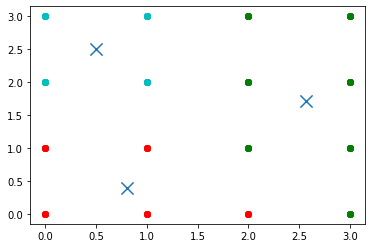

In [ ]:
import matplotlib.pyplot as plt
colors = ["g.", "r.", "c."]
for i in range(len(x)):
  print("coordinate", x[i], "labels:", labels[i])
  plt.plot(x[i][0],x[i][1],colors[labels[i]],markersize=10)

plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 5, zorder = 10)

#Hierarchial clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv("car.data")
print(dataframe.shape)
dataframe.head(10)

(1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [ ]:
x = dataframe.values[:, :-1]
y = dataframe.values[:, -1]
print(x)
print(y)

[['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ['vhigh' 'vhigh' '2' '2' 'med' 'low']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(x.shape[1]):
    x[:,i] = encoder.fit_transform(x[:,i])
print(x)

[[3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

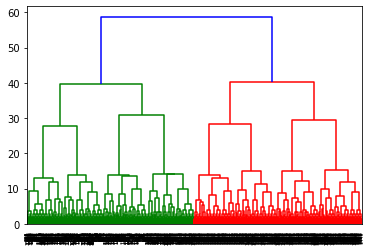

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [ ]:
y_hc = hc.fit_predict(x)

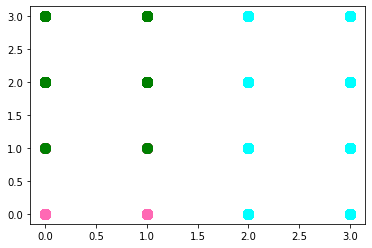

In [ ]:
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s=100, c='cyan')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s=100, c='hotpink')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s=100, c='green')

#DBScan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import DBSCAN

In [ ]:
dataframe = pd.read_csv("car.data")
print(dataframe.shape)
dataframe.head(10)

(1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [ ]:
x = dataframe.values[:, :-1]
y = dataframe.values[:, -1]
print(x)
print(y)

[['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ['vhigh' 'vhigh' '2' '2' 'med' 'low']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(x.shape[1]):
    x[:,i] = encoder.fit_transform(x[:,i])
print(x)

[[3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [ ]:
clustering = DBSCAN(eps=1, min_samples=2).fit(x)
print(clustering)

DBSCAN(eps=1, min_samples=2)


In [ ]:
clusters = clustering.labels_
print(clusters)


[0 0 0 ... 0 0 0]


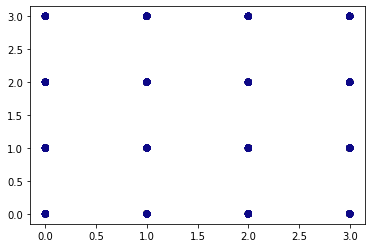

In [ ]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") 
plt.show()